In [1]:
import act
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from scipy.signal import find_peaks

In [2]:
# Set your username and token here!
username = 'gwarner'
token = '1821a4591c6fe828'

# Set the datastream and start/enddates
datastream1 = 'bnfdlfptM1.b1'
datastream2 = 'bnfdlfptS20.b1'
startdate = '2025-04-03'
enddate = '2025-04-05'

# Use ACT to easily download the data.  Watch for the data citation!  Show some support
# for ARM's instrument experts and cite their data if you use it in a publication
results_dl_1 = act.discovery.download_arm_data(username, token, datastream1, startdate, enddate)
results_dl_2 = act.discovery.download_arm_data(username, token, datastream2, startdate, enddate)

[DOWNLOADING] bnfdlfptM1.b1.20250404.100053.cdf
[DOWNLOADING] bnfdlfptM1.b1.20250403.010053.cdf
[DOWNLOADING] bnfdlfptM1.b1.20250403.130053.cdf
[DOWNLOADING] bnfdlfptM1.b1.20250403.220053.cdf
[DOWNLOADING] bnfdlfptM1.b1.20250404.070053.cdf
[DOWNLOADING] bnfdlfptM1.b1.20250404.180054.cdf
[DOWNLOADING] bnfdlfptM1.b1.20250404.030053.cdf
[DOWNLOADING] bnfdlfptM1.b1.20250404.230053.cdf
[DOWNLOADING] bnfdlfptM1.b1.20250403.120053.cdf
[DOWNLOADING] bnfdlfptM1.b1.20250403.160053.cdf
[DOWNLOADING] bnfdlfptM1.b1.20250403.180053.cdf
[DOWNLOADING] bnfdlfptM1.b1.20250404.130053.cdf
[DOWNLOADING] bnfdlfptM1.b1.20250403.020053.cdf
[DOWNLOADING] bnfdlfptM1.b1.20250404.140053.cdf
[DOWNLOADING] bnfdlfptM1.b1.20250404.060053.cdf
[DOWNLOADING] bnfdlfptM1.b1.20250403.000054.cdf
[DOWNLOADING] bnfdlfptM1.b1.20250403.210053.cdf
[DOWNLOADING] bnfdlfptM1.b1.20250404.220053.cdf
[DOWNLOADING] bnfdlfptM1.b1.20250403.090054.cdf
[DOWNLOADING] bnfdlfptM1.b1.20250403.200053.cdf
[DOWNLOADING] bnfdlfptM1.b1.20250404.120

In [4]:
dl_1 = act.io.read_arm_netcdf(results_dl_1)
dl_2 = act.io.read_arm_netcdf(results_dl_2)
dl_1.clean.cleanup()
dl_2.clean.cleanup()
dl_intensity_1=dl_1['intensity']
dl_bs_1=dl_1['attenuated_backscatter']
dl_intensity_2=dl_2['intensity']
dl_bs_2=dl_2['attenuated_backscatter']
bs_1=dl_bs_1.sel(time=slice('2025-04-04T00:00:00', '2025-04-05T00:00:00'),range=slice(100,5000))
bs_1=bs_1.rolling(time=100).mean().dropna('time')
bs_2=dl_bs_2.sel(time=slice('2025-04-04T00:00:00', '2025-04-05T00:00:00'),range=slice(100,5000))
bs_2=bs_2.rolling(time=100).mean().dropna('time')

In [5]:
order_1=np.floor(np.log10(bs_1.values))
idx_1=[]
for n in range(len(bs_1['time'])):
    difference_1=np.diff(order_1[n,:])
    idx_1.append(np.where(difference_1<0)[0][0])
PBL_1=bs_1['range'][idx_1]
order_2=np.floor(np.log10(bs_2.values))
idx_2=[]
for n in range(len(bs_2['time'])):
    difference_2=np.diff(order_2[n,:])
    idx_2.append(np.where(difference_2<0)[0][0])
PBL_2=bs_2['range'][idx_2]

/tmp/ipykernel_4972/789931251.py:1: RuntimeWarning: invalid value encountered in log10
  order_1=np.floor(np.log10(bs_1.values))
/tmp/ipykernel_4972/789931251.py:7: RuntimeWarning: invalid value encountered in log10
  order_2=np.floor(np.log10(bs_2.values))


/tmp/ipykernel_4972/3948843023.py:3: UserWarning: Log scale: values of z <= 0 have been masked
  bs1 = plt.contourf(


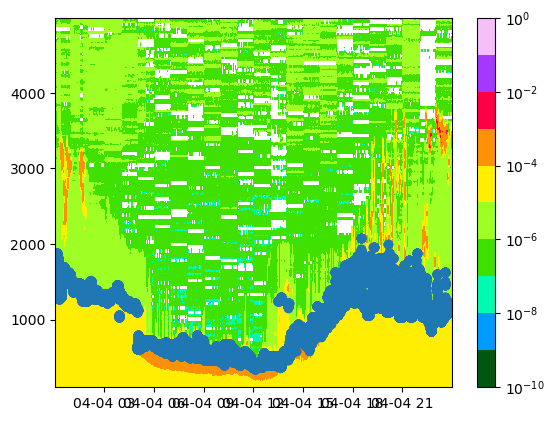

In [6]:
plt.figure()
levels=[1e-10,1e-9,1e-8,1e-7,1e-6,1e-5,1e-4,1e-3,1e-2,1e-1,1e0]
bs1 = plt.contourf(
    bs_1['time'].values,
    bs_1['range'].values,
    np.transpose(bs_1.values),
    cmap='gist_ncar',
    levels=levels,
    norm=colors.LogNorm()
)
plt.colorbar()
plt.scatter(bs_1['time'].values,PBL_1)
plt.show()

/tmp/ipykernel_4972/4032307176.py:3: UserWarning: Log scale: values of z <= 0 have been masked
  bs2 = plt.contourf(


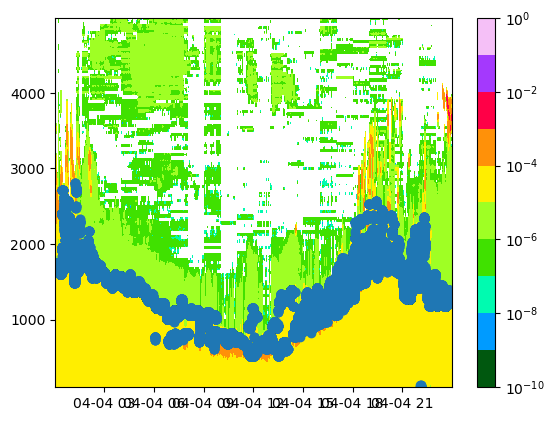

In [7]:
plt.figure()
levels=[1e-10,1e-9,1e-8,1e-7,1e-6,1e-5,1e-4,1e-3,1e-2,1e-1,1e0]
bs2 = plt.contourf(
    bs_2['time'].values,
    bs_2['range'].values,
    np.transpose(bs_2.values),
    cmap='gist_ncar',
    levels=levels,
    norm=colors.LogNorm()
)
plt.colorbar()
plt.scatter(bs_2['time'].values,PBL_2)
plt.show()

In [ ]:
#lt.figure()
#levels=[-10,-9,-8,-7,-6,-5,-4,-3,-2,-1,0]
#bs1 = plt.contourf(
#    bs['time'].values,
#    bs['range']['range'].values,
#    np.transpose(order),
#    cmap='gist_ncar',
#    levels=levels,
    #norm=colors.LogNorm()
#)
#plt.scatter(bs['time'].values,PBL)
#plt.colorbar()
#plt.show()

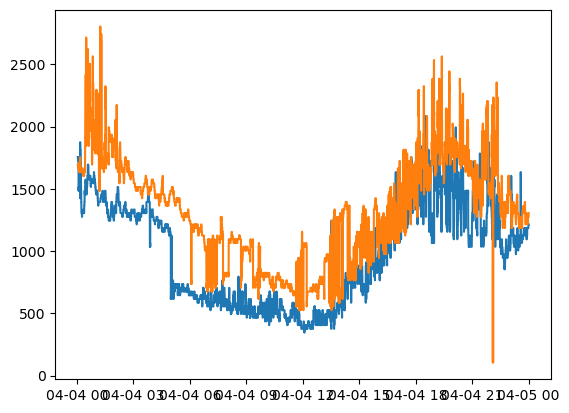

In [9]:
plt.figure
plt.plot(bs_1['time'],PBL_1)
plt.plot(bs_2['time'],PBL_2)
PBL_1.to_netcdf("M1_DL.nc")
PBL_2.to_netcdf("S20_DL.nc")

In [16]:
data=xr.open_dataset('M1_DL.nc')
data.values[10]

TypeError: 'method' object is not subscriptable